In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt

In [3]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')
env.call('../002_design_optics/quad_strength_limits.py')

env.call('../002_design_optics/matching_constraints.py')

In [4]:
# Full service straight with dispersion suppressors
line = (env['cell_us'] + env['straight_l']
                   + (-env['straight_r']) + (-env['cell_su']))

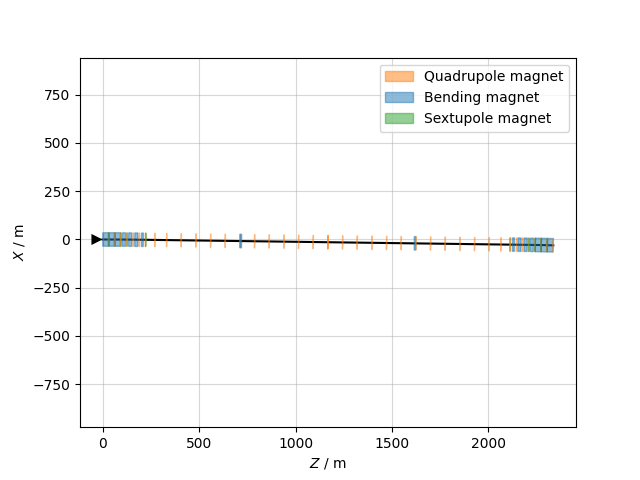

In [5]:
line.survey().plot()

In [6]:
# Arc cell strengths from previous match (to get boundary conditions)
env.vars.load_json('strengths_quads_00_arc_cell.json')

tw_uu = (2 * env['cell_u']).twiss4d()

In [7]:
kq_service_straight = [
    'kqfs0', 'kqds0', 'kqfs1', 'kqds2', 'kqfs3', 'kqds4',
    'kqfs5', 'kqdl1', 'kqfl2', 'kqdl2', 'kqfl3', 'kqdl3',
    'kqfl6', 'kqdl4', 'kqfl4', 'kqfl5', 'kqdl5', 'kqdl6']

In [8]:
# Initialize quadrupoles with a small strength
for nn in kq_service_straight:
    if line.vars.vary_default[nn]['limits'][1] > 1e-3: # Focusing quad
        line[nn] = 1e-3
    else: # Defocusing quad
        line[nn] = -1e-3

In [9]:
opt = line.match(
    solve=False,
    method='4d',
    default_tol=1e-5,
    vary=xt.VaryList(kq_service_straight, step=1e-6),
    betx=tw_uu.betx[0], bety=tw_uu.bety[0],
    alfx=tw_uu.alfx[0], alfy=tw_uu.alfy[0],
    dx=tw_uu.dx[0], dpx=tw_uu.dpx[0],
    targets=[
       xt.TargetSet(at='scenter::0', betx=env['bxsc'], bety=env['bysc'],
                          alfx=0, alfy=0,
                          dx=0, dpx=0),
       xt.TargetSet(at=xt.END,
                    betx=tw_uu.betx[0], bety=tw_uu.bety[0], alfx=0, alfy=0,
                    dx=tw_uu.dx[0], dpx=tw_uu.dpx[0],
                    mux = tw_uu.mux[-1] * 0.5 + 3.0,
                    muy = tw_uu.muy[-1] * 0.5 + 3.0),
       xt.TargetSet(at='qfs1a::0', betx=xt.LessThan(140.)),
       xt.TargetSet(at='qfs3a::0', betx=xt.LessThan(140), bety=xt.GreaterThan(25.)),
       xt.TargetSet(at='qfs5a::0', betx=xt.LessThan(190), bety=xt.GreaterThan(25.)),
       xt.TargetSet(at='qfl2a::0', betx=xt.LessThan(260)),
       xt.TargetSet(at='qfl3a::0', betx=xt.LessThan(env['bxmax']), bety=xt.GreaterThan(62)),
       xt.TargetSet(at='qfl6a::0', betx=xt.LessThan(env['bxmax'])),
       xt.TargetSet(at='qfl4a::0', betx=xt.LessThan(env['bxmax']), bety=xt.GreaterThan(65)),
       xt.TargetSet(at='qfl5a::0', betx=xt.LessThan(env['bxmax'])),
       xt.TargetSet(at='qds0a::0', bety=xt.LessThan(155)),
       xt.TargetSet(at='qds2a::0', bety=xt.LessThan(155)),
       xt.TargetSet(at='qds4a::0', bety=xt.LessThan(155)),
       xt.TargetSet(at='qdl1a::0', bety=xt.LessThan(235)),
       xt.TargetSet(at='qdl2a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl3a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl4a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl5a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl5a::2', bety=xt.LessThan(env['bymax'])),

       xt.TargetSet(at='qdl1a::0', dx=0, dpx=0, weight=10000),
       xt.TargetSet(at='qfl2a::0', dx=0, dpx=0, weight=10000),
       xt.TargetSet(at='qdl2a::0', betx=xt.GreaterThan(50)),
       xt.TargetSet(at='qfl6a::0', bety=xt.GreaterThan(70)),
       xt.TargetSet(at='qdl4a::0', betx=xt.GreaterThan(80)),
    ]      
)

In [10]:
opt.step(50)

                                             
Optimize - start penalty: 2.573e+05     
Matching: model call n. 225               
Optimize - end penalty:  6108.06


In [11]:
opt.targets['END_mux'].weight = 1000
opt.targets['END_muy'].weight = 1000

In [12]:
opt.step(50)

                                             
Optimize - start penalty: 6446            
Matching: model call n. 1352               
Optimize - end penalty:  249.025


In [ ]:
opt.run_simplex(20000)

                                             
Optimize - start penalty: 249              


In [ ]:
opt.run_simplex(20000)